지도학습 
- 가장 많이 성공적으로 사용되는 머신러닝 방법
- 입력과 출력 샘플로 학습하고, 모델에 입력을 넣에 출력을 예측할 때 사용

# 2.1 분류와 회귀
- 분류는 여러 클래스 레이블 중 하나를 예측
- 회귀는 연속적인 숫자 예측

# 2.2 일반화, 과대적합, 과소적합
- 처음보는 데이터에 대해서도  잘 예측하면 모델이 훈련세트에서 테스트 세트로 일반화되었다. => generalization(최적, 목표)
- 학습은 잘 되었는데, 테스트는 예측이 잘 안된다. 너무 상세하게 조건단 모델=> overfitting(과대적합)
- 학습도 테스트도 잘 안된다. 너무 간단한 모델 => underfitting(과소적합)

# 2.3.1 예제에 사용할 데이터셋

In [6]:
# p58
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Text(0, 0.5, '두번째 특성')

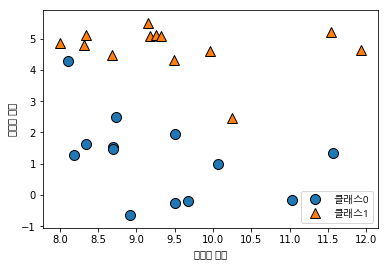

In [8]:
x, y = mglearn.datasets.make_forge() //forge 데이터셋은 인위적으로 만든 이진 분류 데이터셋
mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.rc('font', family = 'Malgun Gothic')
plt.legend(['클래스0', '클래스1'])
plt.xlabel('첫번째 특성')
plt.ylabel('두번째 특성')


Text(0, 0.5, '타겟')

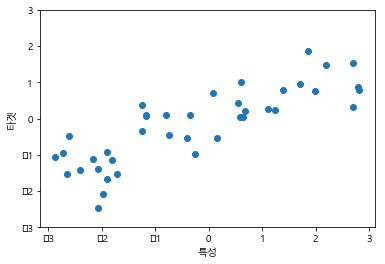

In [12]:
x, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(x,y,'o')
plt.ylim(-3,3)
plt.xlabel('특성')
plt.ylabel('타겟')

In [13]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [14]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [15]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [16]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

# 2.3.2 k-최근접 이웃
- 훈련 데이터셋에서 가장 가까운 데이터 포인트, 즉 '최근접 이웃'을 찾습니다.

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


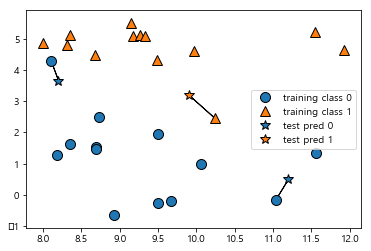

In [17]:
# 63
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


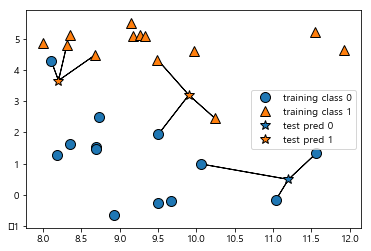

In [19]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [22]:
# 유방암 분류 - KNN Classifier / 회귀 - KNN Regressor
import sklearn.datasets as datasets

In [23]:
# 1. 데이터 생성
cancer = datasets.load_breast_cancer()

In [24]:
cancer.data.shape, cancer.target_names

((569, 30), array(['malignant', 'benign'], dtype='<U9'))

In [25]:
cancer.target_names = ['악성', '양성']

In [28]:
# KNN Classifier로 분류
from sklearn.model_selection import train_test_split

In [37]:
# 2. 테스트 및 학습 데이터 분류
x = cancer.data
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y)
x.shape, x_train.shape, x_test.shape

((569, 30), (426, 30), (143, 30))

In [38]:
# 3. 학습
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
# 4. 평가
print('학습셋', knn.score(x_train, y_train))
print('테스트셋', knn.score(x_test, y_test))

학습셋 0.9460093896713615
테스트셋 0.9370629370629371
